#Projet Vélo

### Énoncé :
https://latitudes.notion.site/Pr-sentation-des-projets-de-l-Open-Data-University-5abab2bb9a6e453d817fe6bdf3806413

### Config

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install geojson
import geojson
import pandas as pd

# A modifier pour retrouver les fichiers
files_path = '/content/drive/MyDrive/Challenge_IA_Velo/' 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Creation of accident dataframe

In [ ]:
# Charger le fichier GeoJSON
with open(files_path + 'Data/france-20230101.geojson', 'r') as f:
    data = geojson.load(f)

In [ ]:
# Imprimer les coordonnées ( > 2 minutes pour tout afficher et j'ai pas capté ce que c'était)
k = 0
for feature in data['features']:
    k+=1
    print(feature['geometry']['coordinates'])
    # Affiches longitudes et latitude correspondant à des villes en France
    if k == 3 :
      break

[[0.005851, 47.086212], [0.00575, 47.086436], [0.005647, 47.086569]]
[[0.024023, 44.529839], [0.024091, 44.529895]]
[[0.047086, 43.220046], [0.046962, 43.220395]]


In [ ]:
vehicule_2021 = pd.read_csv(files_path + 'Data/vehicules-2021.csv', sep = ";")
vehicule_2020 = pd.read_csv(files_path + 'Data/vehicules-2020.csv', sep = ";")
vehicule_2019 = pd.read_csv(files_path + 'Data/vehicules-2019.csv', sep = ";")
vehicule_2018 = pd.read_csv(files_path + 'Data/vehicules-2018.csv', sep = ",")

lst = [vehicule_2018, vehicule_2019, vehicule_2020, vehicule_2021]  
vehicule_df= pd.concat(lst, axis =0)

vehicule_df.head()
print(vehicule_df.shape)
print(vehicule_2018.shape)

(377967, 11)
(98876, 9)


In [ ]:
velo_df = vehicule_df.loc[vehicule_df["catv"] == 1]
velo_df.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor
6,201800000004,0.0,1,0.0,0.0,2.0,8.0,0.0,B01,NaN,NaN
30,201800000020,2.0,1,0.0,12.0,0.0,7.0,1.0,B01,NaN,NaN
71,201800000044,1.0,1,0.0,0.0,0.0,8.0,2.0,A01,NaN,NaN
81,201800000051,1.0,1,0.0,0.0,0.0,4.0,2.0,B01,NaN,NaN
91,201800000056,2.0,1,0.0,0.0,2.0,6.0,2.0,B01,NaN,NaN


In [ ]:
len(velo_df)

20603

In [ ]:
caracteristiques_2021 = pd.read_csv(files_path + 'Data/carcteristiques-2021.csv', sep = ";")
caracteristiques_2020 = pd.read_csv(files_path + 'Data/caracteristiques-2020.csv', sep = ";")
caracteristiques_2019 = pd.read_csv(files_path + 'Data/caracteristiques-2019.csv', sep = ";")
caracteristiques_2018 = pd.read_csv(files_path + 'Data/caracteristiques-2018.csv', sep = ",", encoding="ISO-8859-1")

lst = [caracteristiques_2018, caracteristiques_2019, caracteristiques_2020, caracteristiques_2021]  
caracteristiques_df= pd.concat(lst, axis =0)

caracteristiques_df.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn        object
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com         object
adr         object
gps         object
lat         object
long        object
dep         object
dtype: object

In [ ]:
lieux_2021 = pd.read_csv(files_path + 'Data/lieux-2021.csv', sep = ";")
lieux_2020 = pd.read_csv(files_path + 'Data/lieux-2020.csv', sep = ";")
lieux_2019 = pd.read_csv(files_path + 'Data/lieux-2019.csv', sep = ";")
lieux_2018 = pd.read_csv(files_path + 'Data/lieux-2018.csv', sep = ",", encoding="ISO-8859-1")

lst = [lieux_2018, lieux_2019, lieux_2020, lieux_2021]  
lieux_df= pd.concat(lst, axis =0)

lieux_df.head()
lieux_df.dtypes

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Num_Acc      int64
catr         int64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
pr          object
pr1         object
vosp       float64
prof       float64
plan       float64
lartpc      object
larrout     object
surf       float64
infra      float64
situ       float64
env1       float64
vma        float64
dtype: object

In [ ]:
accident_df = pd.merge(velo_df, caracteristiques_df, on='Num_Acc', how='inner')

In [ ]:
accidents_df = pd.merge(accident_df, lieux_df, on='Num_Acc', how='inner')
accidents_df.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,...,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,201800000004,0.0,1,0.0,0.0,2.0,8.0,0.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
1,201800000020,2.0,1,0.0,12.0,0.0,7.0,1.0,B01,NaN,...,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
2,201800000044,1.0,1,0.0,0.0,0.0,8.0,2.0,A01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
3,201800000051,1.0,1,0.0,0.0,0.0,4.0,2.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
4,201800000056,2.0,1,0.0,0.0,2.0,6.0,2.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN


In [ ]:
accidents_df.shape

(20603, 44)

In [ ]:
# accidents_df.to_csv(files_path + 'Data/row_dataset.csv', index=False)

## Merge with flux

In [204]:
dataset_row = pd.read_csv(files_path + 'Data/row_dataset.csv')
dataset_row.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,...,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,201800000004,0.0,1,0.0,0.0,2.0,8.0,0.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
1,201800000020,2.0,1,0.0,12.0,0.0,7.0,1.0,B01,NaN,...,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
2,201800000044,1.0,1,0.0,0.0,0.0,8.0,2.0,A01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
3,201800000051,1.0,1,0.0,0.0,0.0,4.0,2.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN
4,201800000056,2.0,1,0.0,0.0,2.0,6.0,2.0,B01,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN


In [205]:
# Pas très utile cette cellule, on arrive pas à récupérer les flux des accidents 2018
dataset_2018 = dataset_row.loc[dataset_row['an'] == 18]
df = dataset_row.loc[dataset_row['an'] != 18]

dataset_2018.drop('voie', axis = 1)
dataset_2018.rename(columns = {'adr':'voie'}, inplace = True)

dataset_2018 = dataset_2018.reset_index(inplace=True, drop=True)

dataset = pd.concat([dataset_2018, df], axis = 0)
dataset.dtypes

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Num_Acc          int64
senc           float64
catv             int64
occutc         float64
obs            float64
obsm           float64
choc           float64
manv           float64
num_veh         object
id_vehicule     object
motor          float64
an               int64
mois             int64
jour             int64
hrmn            object
lum              int64
agg              int64
int              int64
atm            float64
col            float64
com             object
adr             object
gps             object
lat             object
long            object
dep             object
catr             int64
voie            object
v1             float64
v2              object
circ           float64
nbv            float64
pr              object
pr1             object
vosp           float64
prof           float64
plan           float64
lartpc          object
larrout         object
surf           float64
infra          float64
situ           float64
env1           float64
vma        

In [206]:
def name_formating(nom_compteur):
  return nom_compteur[:-6]
print(name_formating('rue cb NE-SE'))

def suppress_winter_hour(date):
  caracteres = list(date)
  caracteres[-4] = "0"
  date = "".join(caracteres)
  return date
print(suppress_winter_hour('2019-11-29T01:00:00+01:00'))

rue cb
2019-11-29T01:00:00+00:00


In [207]:
flux_2021 = pd.read_csv(files_path + 'Data/comptage-velo-donnees-compteurs.csv', sep = ";")
flux_2020 = pd.read_csv(files_path + 'Data/comptage-velo-donnees-compteurs-2020.csv', sep = ";")
flux_2019 = pd.read_csv(files_path + 'Data/comptage-velo-donnees-compteurs-2019.csv', sep = ";")
flux_2018 = pd.read_csv(files_path + 'Data/comptage-velo-donnees-compteurs-2018.csv', sep = ";")

flux_2021.rename(columns = {'sum_counts':'Comptage horaire'}, inplace = True)
flux_2020.rename(columns = {'Date et heure de comptage':'date'}, inplace = True)
flux_2019.rename(columns = {'Date et heure de comptage':'date'}, inplace = True)
flux_2018.rename(columns = {'Date et heure de comptage':'date'}, inplace = True)

flux_2020["Nom du compteur"] = flux_2020["Nom du compteur"].apply(name_formating)
flux_2019["Nom du compteur"] = flux_2019["Nom du compteur"].apply(name_formating)
flux_2018["Nom du compteur"] = flux_2018["Nom du compteur"].apply(name_formating)

flux_2020["date"] = flux_2020["date"].apply(suppress_winter_hour)
flux_2019["date"] = flux_2019["date"].apply(suppress_winter_hour)
flux_2018["date"] = flux_2018["date"].apply(suppress_winter_hour)

flux_2020.rename(columns = {'Nom du compteur':'name'}, inplace = True)
flux_2019.rename(columns = {'Nom du compteur':'name'}, inplace = True)
flux_2018.rename(columns = {'Nom du compteur':'name'}, inplace = True)

lst = [flux_2018, flux_2019, flux_2020, flux_2021]  
flux_df= pd.concat(lst, axis =0)

flux_df.head()

,Identifiant du compteur,name,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,date,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,id_compteur,...,installation_date,url_photos_n1,coordinates,counter,photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100047547-104047547,6 rue Julia Bartet,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+00:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100047547-104047547,6 rue Julia Bartet,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+00:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100047547-104047547,6 rue Julia Bartet,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+00:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100047547-104047547,6 rue Julia Bartet,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+00:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100047547-104047547,6 rue Julia Bartet,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+00:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
print(dataset['an'].min())
print(dataset['an'].max())

2019
2021


In [209]:
def formating_year(yyyy):
  if yyyy < 100 :
    return "20" + str(yyyy)
  return str(yyyy)

def formating_month(mm):
  if mm < 10 :
    return "0" + str(mm)
  return str(mm)

def formating_day(dd):
  if dd < 10 :
    return '0' + str(dd)
  return str(dd)

def formating_hour(hh_mm):
  return str(hh_mm[:2])
formating_hour("03:12")

'03'

In [210]:
def date_formating(yyyy, mm, dd, hh_mm):
  yyyy = formating_year(yyyy)
  mm = formating_month(mm)
  dd = formating_day(dd)
  hh = formating_hour(hh_mm)
  return yyyy + "-" + mm + "-" + dd + "T" + hh+":00:00+00:00"

date_formating(18, 1, 12, "12:12")

'2018-01-12T12:00:00+00:00'

In [211]:
dataset['date'] = dataset.apply(lambda x: date_formating(x['an'], x['mois'], x['jour'], x['hrmn']), axis=1)

In [165]:
!pip install unidecode
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 8.4 MB/s eta 0:00:00


In [212]:
def street_formating(street):
  if (("(" in street) and (")" in street)):
    i1 = street.index('(')
    i2 = street.index(')')
    voie = street[i1:i2]
    street = street[:i1]
    street = voie + street
  street = ''.join(x for x in street if (x.isalpha() )) #or x == ' '))
  street = unidecode.unidecode(street)
  street = street.lower()
  return street

street_formating("Vieux Chêne (Rue)")

'ruevieuxchene'

In [213]:
# Conserver uniquement les voie qui sont sous la forme de string 
# Retire les Nan, les integer, les espaces, les majuscules, et les voies de - de 5 lettres
dataset = dataset[dataset['voie'].apply(lambda x: (isinstance(x, str) and len(x) > 10))]
dataset["voie"] = dataset['voie'].apply(street_formating)
dataset["voie"].head()

<ipython-input-213-9ca005162619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["voie"] = dataset['voie'].apply(street_formating)


4967        avenuejeanjaures
4968         placejeanmoulin
4969    turpindecrisseavenue
4970           ruedesmontees
4971          crsjournuauber
Name: voie, dtype: object

In [214]:
# Conserver uniquement les voie qui sont sous la forme de string 
# Retire les Nan, les integer, les espaces, les majuscules, et les voies de - de 5 lettres
flux_df = flux_df[flux_df['name'].apply(lambda x: (isinstance(x, str) and len(x) > 5))]
flux_df["name"] = flux_df['name'].apply(street_formating)
flux_df.rename(columns = {'name':'voie'}, inplace = True)
flux_df["voie"].head()

0    ruejuliabartet
1    ruejuliabartet
2    ruejuliabartet
3    ruejuliabartet
4    ruejuliabartet
Name: voie, dtype: object

In [169]:
flux_accident = pd.merge(flux_df, dataset, on=['date', 'voie'], how='inner')
flux_accident.shape

(120, 66)

In [ ]:
# flux_accident.to_csv(files_path + 'Data/accident_flux.csv', index=False)

In [ ]:
test = flux_df[flux_df['date'].str.startswith('2019-11-29')]
test['date'].unique()

array(['2018-11-29T01:00:00+00:00', '2018-11-29T22:00:00+00:00',
       '2018-11-30T17:00:00+00:00', ..., '2023-01-10T07:00:00+00:00',
       '2023-01-10T15:00:00+00:00', '2021-11-29T22:00:00+00:00'],
      dtype=object)

In [ ]:
most_used_axes = flux_accident.groupby(['voie'])['voie'].count()
most_used_axes.sort_values(ascending = False).head(20)

voie
boulevardvoltaire          28
voiegeorgespompidou        20
boulevarddemagenta         14
boulevardsaintgermain      10
quaidelhoteldeville         8
avenuedaumesnil             7
avenuedelagrandearmee       4
avenuedeschampselysees      4
boulevarddemenilmontant     4
quaifrancoismauriac         4
ruejuliabartet              4
avenuedenfertrochereau      2
boulevardaugusteblanqui     2
avenuedeflandre             2
quaidelatournelle           2
ruedevaugirard              2
ruelafayette                2
ruesaintjacques             1
Name: voie, dtype: int64

In [ ]:
print(flux_accident['date'].min())
print(flux_accident['date'].max())

2019-01-16T13:00:00+00:00
2021-12-28T19:00:00+00:00


## Traitement flux_accident
### Choix catégories

In [24]:
accident_flux = pd.read_csv(files_path + 'Data/accident_flux.csv')
accident_flux.head()

,Identifiant du compteur,voie,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,date,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,id_compteur,...,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,100050132-SC,boulevardsaintgermain,100050132.0,243 Boulevard Saint Germain NO-SE,72.0,2019-08-31T17:00:00+00:00,2018-12-13,https://www.eco-visio.net/Photos/100050132/157...,"48.86179,2.32014",NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,50.0
1,100042374-110042374,voiegeorgespompidou,100042374.0,Voie Georges Pompidou,85.0,2019-07-11T08:00:00+00:00,2017-12-15,https://www.eco-visio.net/Photos/100042374/151...,"48.848399,2.275932",NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,50.0
2,100042374-109042374,voiegeorgespompidou,100042374.0,Voie Georges Pompidou,200.0,2019-07-11T08:00:00+00:00,2017-12-15,https://www.eco-visio.net/Photos/100042374/151...,"48.848399,2.275932",NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,50.0
3,100044506-SC,boulevardvoltaire,100044506.0,72 boulevard Voltaire NO-SE,152.0,2019-03-13T20:00:00+00:00,2018-06-27,https://www.eco-visio.net/Photos/100044506/153...,"48.86155,2.37407",NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,50.0
4,100044493-SC,boulevardvoltaire,100044493.0,67 boulevard Voltaire SE-NO,103.0,2019-03-13T20:00:00+00:00,2018-06-27,https://www.eco-visio.net/Photos/100044493/153...,"48.86149,2.37376",NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,50.0


On pourrait regarder des catégories par : 'dep' (département), 'com' (commune), 'agg' (en ou hors agglomération), 'int' (type d'intersection), 'catr' (catégorie de route), 'circ' (régime de circulation - sens unique, double ...), 'vma' (limite de vitesse autorisée).

In [25]:
grouped_voie = accident_flux.groupby(['voie', 'Comptage horaire'])['voie', 'Comptage horaire'].count()
grouped_voie

<ipython-input-25-ae6a9e77bea8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_voie = accident_flux.groupby(['voie', 'Comptage horaire'])['voie', 'Comptage horaire'].count()


voie  Comptage horaire
voie                Comptage horaire                        
avenuedaumesnil     0.0                  1                 1
                    49.0                 1                 1
                    70.0                 1                 1
                    117.0                1                 1
                    146.0                1                 1
...                                    ...               ...
voiegeorgespompidou 120.0                2                 2
                    136.0                1                 1
                    147.0                1                 1
                    200.0                1                 1
                    219.0                1                 1

[87 rows x 2 columns]

In [46]:
accident_flux['int'].unique() # Par type d'intersection, on peut garder 1, 2, 3, 4 et sup les autres.

array([2, 4, 1, 3, 7, 5])

In [51]:
  int1 = accident_flux.loc[accident_flux['int'] == 1]
  int2 = accident_flux.loc[accident_flux['int'] == 2]
  int3 = accident_flux.loc[accident_flux['int'] == 3]
  int4 = accident_flux.loc[accident_flux['int'] == 4]
  # group5 = accident_flux.loc[accident_flux['int'] == 5] Pas assez d'instance pour le traiter
  # group6 = accident_flux.loc[accident_flux['int'] == 6] Idem
  # group7 = accident_flux.loc[accident_flux['int'] == 7]
  int1.shape

(41, 66)

In [17]:
int2.shape

(37, 66)

In [19]:
int3.shape

(20, 66)

In [20]:
int4.shape

(15, 66)

In [47]:
accident_flux['circ'].unique() # Très déséquilibré, toutes les instances sont dans le sens de circulation 2

array([ 1.,  2., -1.,  3.,  4.])

In [48]:
print(accident_flux['catr'].unique()) # Il n'y a qu'un seul type de catégrie donc nul
print(accident_flux['agg'].unique()) # idem

[4]
[2]


In [49]:
accident_flux['vma'].unique() # deux vitesse sont surreprésentées 30 et 50 (surtout 50)

array([50., 30., 10., 20.])

In [39]:
vma1 = accident_flux.loc[accident_flux['vma'] == 10]
vma1.shape

(2, 66)

In [40]:
vma1 = accident_flux.loc[accident_flux['vma'] == 20]
vma1.shape

(4, 66)

In [41]:
vma1 = accident_flux.loc[accident_flux['vma'] == 30]
vma1.shape

(31, 66)

In [66]:
vma1 = accident_flux.loc[accident_flux['vma'] == 50]
vma1.shape[0]

83

Graphs pour int

In [85]:
border_list = [50.0, 100.0, 150, 200.0]

group1_int2 = int2.loc[int2['Comptage horaire'] < border_list[0]]

group2_int2 = int2.loc[int2['Comptage horaire'] >= border_list[0]]
group2_int2 = group2_int2.loc[int2['Comptage horaire'] < border_list[1]]

group3_int2 = int2.loc[int2['Comptage horaire'] >= border_list[1]]
group3_int2 = group3_int2.loc[int2['Comptage horaire'] < border_list[2]]

group4_int2 = int2.loc[int2['Comptage horaire'] >= border_list[2]]
group4_int2 = group4_int2.loc[int2['Comptage horaire'] < border_list[3]]

group5_int2 = int2.loc[int2['Comptage horaire'] >= border_list[3]]



In [86]:
effectifs = [group1_int2.shape[0], group2_int2.shape[0], group3_int2.shape[0], group4_int2.shape[0], group5_int2.shape[0]]
flux_moyen = [25, 75, 125, 175, 225]

In [87]:
int2['Comptage horaire'].unique()

array([ 72., 152., 103., 311., 126.,  62.,  68.,  30.,  16.,  70.,  84.,
        66.,  76., 372., 275.,  85., 217., 134.,  98.,  28.,  29.,  35.,
        33.,  67.,  49.,  50.,  nan])

Text(0.5, 1.0, "evolution du nombre d'accident en fonction du flux")

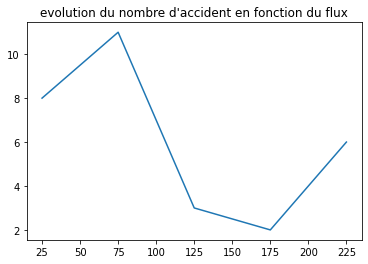

In [90]:
import matplotlib.pyplot as plt

plt.plot(flux_moyen, effectifs)
plt.title("evolution du nombre d'accident en fonction du flux")

In [228]:
occurence_comptage = flux_df.groupby(['Comptage horaire'])['Comptage horaire'].count().reset_index(name='counts')
occurence_comptage

,Comptage horaire,counts
0,0.0,214498
1,1.0,99500
2,2.0,82198
3,3.0,70029
4,4.0,60198
...,...,...
1168,1327.0,1
1169,1357.0,1
1170,2423.0,1
1171,4791.0,1


In [231]:
nb_heure_considerees = occurence_comptage['counts'].sum()

occurence_comptage['poids comptage'] = occurence_comptage['counts']/nb_heure_considerees
occurence_comptage

,Comptage horaire,counts,poids comptage
0,0.0,214498,9.413534e-02
1,1.0,99500,4.366691e-02
2,2.0,82198,3.607370e-02
3,3.0,70029,3.073317e-02
4,4.0,60198,2.641870e-02
...,...,...,...
1168,1327.0,1,4.388635e-07
1169,1357.0,1,4.388635e-07
1170,2423.0,1,4.388635e-07
1171,4791.0,1,4.388635e-07


## Infos macro

In [152]:
maille = 50
border_list = [ maille * (k+1) for k in range(round(400/maille))]
l = len(border_list)
accident_flux['Comptage ajusté']

groups = [accident_flux.loc[accident_flux['Comptage horaire'] < border_list[0]]]

for k in range(l - 1):
  group = accident_flux.loc[accident_flux['Comptage horaire'] >= border_list[k]]
  group = group.loc[accident_flux['Comptage horaire'] < border_list[k+1]]
  groups.append(group)

groups.append(accident_flux.loc[accident_flux['Comptage horaire'] >= border_list[-1]]) 

In [153]:
effectif = [groups[k].shape[0] for k in range(len(groups)) ]
flux_moyen = [border_list[0]/2]  
flux_moyen += [(border_list[k] + border_list[k+1])/2 for k in range(l-1)]
flux_moyen += [border_list[-1] + flux_moyen[0]] 

In [154]:
print(accident_flux['Comptage horaire'].min())
print(accident_flux['Comptage horaire'].max())

0.0
401.0


Text(0.5, 1.0, "evolution du nombre d'accident en fonction du flux")

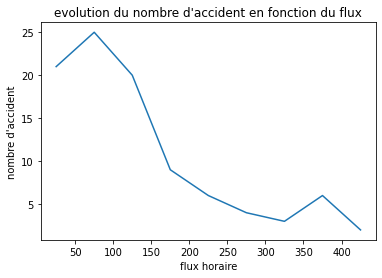

In [155]:
plt.plot(flux_moyen, effectif)
plt.xlabel('flux horaire')
plt.ylabel("nombre d'accident")
plt.title("evolution du nombre d'accident en fonction du flux")

In [156]:
accident_flux.groupby(['dep'])['dep'].count()

dep
17      2
75    117
91      1
Name: dep, dtype: int64

# Info *menseulles*

In [215]:
def date_to_month(date):
  return date[:7]
date_to_month('2018-01-12T12:00:00+00:00')

'2018-01'

In [216]:
dataset["date"] = dataset['date'].apply(date_to_month)
dataset["date"].head()

4967    2019-11
4968    2019-11
4969    2019-11
4970    2019-11
4971    2019-11
Name: date, dtype: object

In [217]:
accident_by_road_month = dataset.groupby(['date','voie'])['voie'].count()
accident_by_road_month

date     voie                
2019-01  alleedumanoir           1
         alleemahatmagandhi      1
         alleemermoz             1
         alsacelorrained         1
         argelessurmeravenued    1
                                ..
2021-12  vermorelvictorbd        1
         villesicard             1
         vladimirboulevardde     1
         voiegeorgespompidou     2
         ypresrued               1
Name: voie, Length: 7055, dtype: int64

In [181]:
# accident_by_road_month.to_csv(files_path + 'Data/accident_by_month.csv', index=True)

In [218]:
flux_df["date"] = flux_df['date'].apply(date_to_month)


In [219]:
flux_by_month = flux_df.groupby(['date','voie'])['Comptage horaire'].mean()
flux_by_month

date     voie                      
2018-01  avenuedaumesnil                25.407258
         avenuedenfertrochereau         16.188172
         boulevarddider                 11.829301
         quaidelhoteldeville            18.526210
         quaifrancoismauriac            15.198253
                                          ...    
2023-01  totemboulevarddesebastopol    211.186192
         totemcourslareine              68.096234
         totemquaidausterlitz           79.642259
         totemruederivoli              137.960251
         voiegeorgespompidou            48.956067
Name: Comptage horaire, Length: 1805, dtype: float64

In [220]:
flux_by_month.to_csv(files_path + 'Data/mean_flux_by_month_road.csv', index=True)

In [221]:
flux_df.dtypes

Identifiant du compteur                        object
voie                                           object
Identifiant du site de comptage               float64
Nom du site de comptage                        object
Comptage horaire                              float64
date                                           object
Date d'installation du site de comptage        object
Lien vers photo du site de comptage            object
Coordonnées géographiques                      object
id_compteur                                    object
nom_compteur                                   object
id                                            float64
installation_date                              object
url_photos_n1                                  object
coordinates                                    object
counter                                        object
photos                                         object
test_lien_vers_photos_du_site_de_comptage_     object
id_photo_1                  